# Car Rental Data Exploration

This notebook explores the car rental datasets to understand their structure and content before processing them with Spark on EMR.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set plot style
plt.style.use("ggplot")
sns.set(style="whitegrid")

# Configure pandas display options
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 20)
pd.set_option("display.width", 1000)

## Load the Datasets

Let's load the four datasets: vehicles, users, locations, and rental transactions.

In [2]:
# Define the data directory
data_dir = "../data"

# Load the datasets
vehicles_df = pd.read_csv(os.path.join(data_dir, "vehicles.csv"))
users_df = pd.read_csv(os.path.join(data_dir, "users.csv"))
locations_df = pd.read_csv(os.path.join(data_dir, "locations.csv"))
transactions_df = pd.read_csv(os.path.join(data_dir, "rental_transactions.csv"))

print(f"Vehicles dataset shape: {vehicles_df.shape}")
print(f"Users dataset shape: {users_df.shape}")
print(f"Locations dataset shape: {locations_df.shape}")
print(f"Rental transactions dataset shape: {transactions_df.shape}")

Vehicles dataset shape: (109584, 14)
Users dataset shape: (30000, 9)
Locations dataset shape: (300, 8)
Rental transactions dataset shape: (20080, 8)


## Explore the Vehicles Dataset

In [3]:
# Display the first few rows of the vehicles dataset
vehicles_df.head()

,active,vehicle_license_number,registration_name,license_type,expiration_date,permit_license_number,certification_date,vehicle_year,base_telephone_number,base_address,vehicle_id,last_update_timestamp,brand,vehicle_type
0,1,5818886,"CITY,LIVERY,LEASING,QUEENS,INC",FOR HIRE VEHICLE,27-09-2025,6EPABCVK,2018-01-09,2018,(646)780-0129,1515 THIRD STREET SAN FRANCISCO CA 94158,67789f742d,04-06-2024 13:25:00,Ferrari,high_end
1,1,5520432,"FERNANDEZ,JOSE,A",FOR HIRE VEHICLE,08-01-2026,IC0VQ8EC,2015-01-21,2015,(646)780-0129,1515 THIRD STREET SAN FRANCISCO CA 94158,70e8c42e4f,04-06-2024 13:25:00,BMW,premium
2,1,5790608,"RIGO,LIMO-AUTO,CORP",FOR HIRE VEHICLE,19-06-2025,AGTGT62I,2020-03-31,2020,(646)780-0129,1515 THIRD STREET SAN FRANCISCO CA 94158,aa2522d199,04-06-2024 13:25:00,Toyota,basic
3,1,6045671,"NARZIEV,LAZIZJON",FOR HIRE VEHICLE,22-11-2025,OO9QLG6E,2022-11-09,2022,(646)780-0129,1515 THIRD STREET SAN FRANCISCO CA 94158,0984531ace,04-06-2024 13:25:00,Chevrolet,basic
4,1,6022074,"YAQOOB,SAAD",FOR HIRE VEHICLE,05-04-2025,3U109JZC,2018-11-29,2018,(646)780-0129,1515 THIRD STREET SAN FRANCISCO CA 94158,1ee2538be7,04-06-2024 13:25:00,Tesla,high_end


In [5]:
# Check for missing values
vehicles_df.isnull().sum()

active                    0
vehicle_license_number    0
registration_name         0
license_type              0
expiration_date           0
permit_license_number     0
certification_date        0
vehicle_year              0
base_telephone_number     0
base_address              0
vehicle_id                0
last_update_timestamp     0
brand                     0
vehicle_type              0
dtype: int64

vehicle_type
high_end    36720
basic       36538
premium     36326
Name: count, dtype: int64


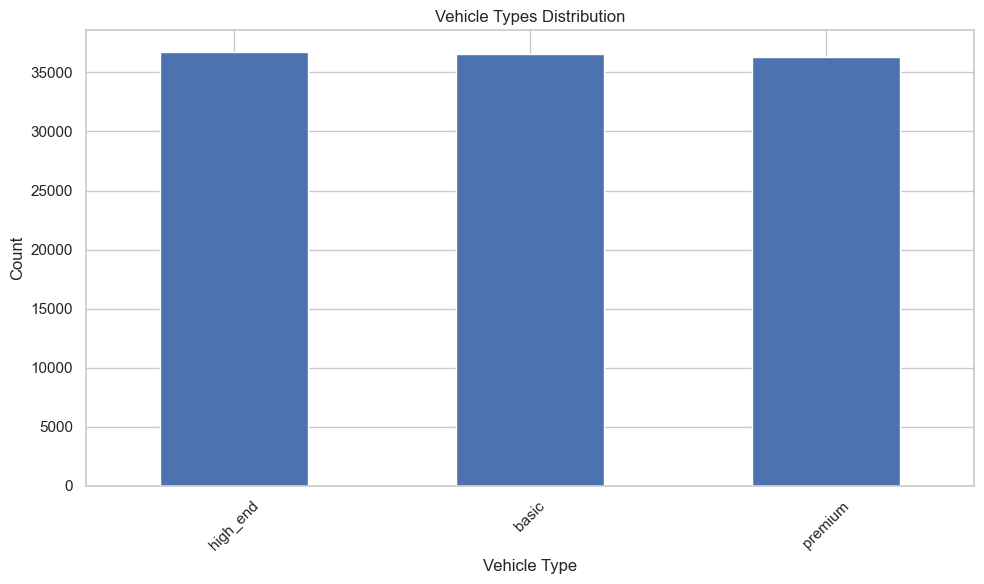

In [4]:
# Analyze vehicle types
vehicle_type_counts = vehicles_df["vehicle_type"].value_counts()
print(vehicle_type_counts)

# Plot vehicle types
plt.figure(figsize=(10, 6))
vehicle_type_counts.plot(kind="bar")
plt.title("Vehicle Types Distribution")
plt.xlabel("Vehicle Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

brand
Nissan           7432
Tesla            7399
Porsche          7338
Ferrari          7332
Chevrolet        7330
Lamborghini      7329
Bentley          7322
Cadillac         7308
Mercedes-Benz    7302
BMW              7302
Name: count, dtype: int64


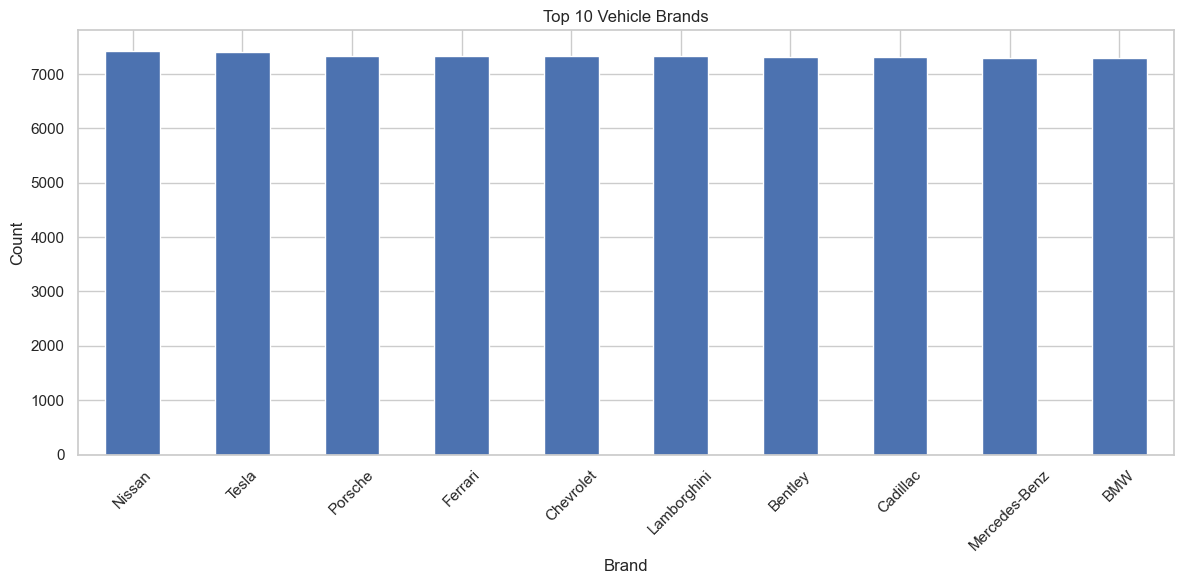

In [6]:
# Analyze vehicle brands
brand_counts = vehicles_df["brand"].value_counts().head(10)
print(brand_counts)

# Plot top 10 vehicle brands
plt.figure(figsize=(12, 6))
brand_counts.plot(kind="bar")
plt.title("Top 10 Vehicle Brands")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Explore the Users Dataset

In [7]:
# Display the first few rows of the users dataset
users_df.head()

,user_id,first_name,last_name,email,phone_number,driver_license_number,driver_license_expiry,creation_date,is_active
0,26d08ab733,Lisa,Parker,lisa.parker@gmail.com,334.271.2972x60554,MO028963,2033-06-21,2024-05-26,1
1,0a0430e6f9,Courtney,Martin,courtney.martin@yahoo.com,826-262-0518x252,VW966518,2028-09-28,2024-05-22,0
2,eb5d10cccd,Andrew,Mcclain,andrew.mcclain@hotmail.com,+1-467-858-1702,WL839491,2028-09-01,2024-01-29,1
3,2a59127ee0,Michael,Hoover,michael.hoover@yahoo.com,001-220-342-6250,UI603163,2028-11-29,2024-03-22,1
4,e3a46a2a11,Molly,Brooks,molly.brooks@yahoo.com,+1-595-498-7645,BJ158232,2025-01-24,2024-03-02,1


In [8]:
# Check for missing values
users_df.isnull().sum()

user_id                  0
first_name               0
last_name                0
email                    0
phone_number             0
driver_license_number    0
driver_license_expiry    0
creation_date            0
is_active                0
dtype: int64

is_active
Active      24012
Inactive     5988
Name: count, dtype: int64


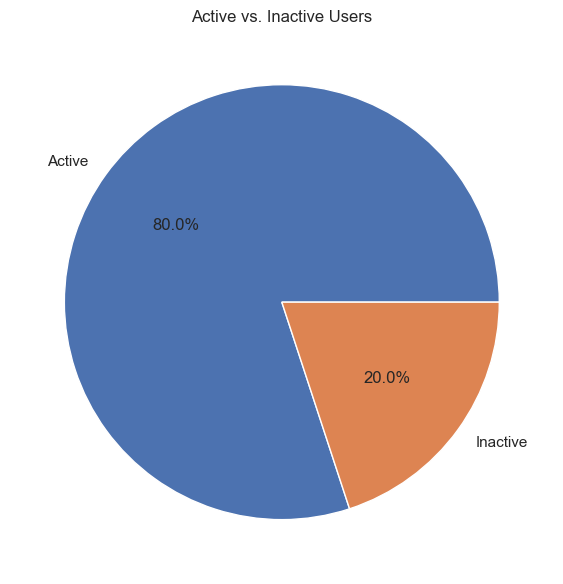

In [32]:
# Analyze active users
active_users_count = (
    users_df["is_active"].map({1: "Active", 0: "Inactive"}).value_counts()
)
print(active_users_count)

# Plot active users
plt.figure(figsize=(8, 6))
active_users_count.plot(kind="pie", autopct="%1.1f%%")
plt.title("Active vs. Inactive Users")
plt.ylabel("")
plt.tight_layout()
plt.show()

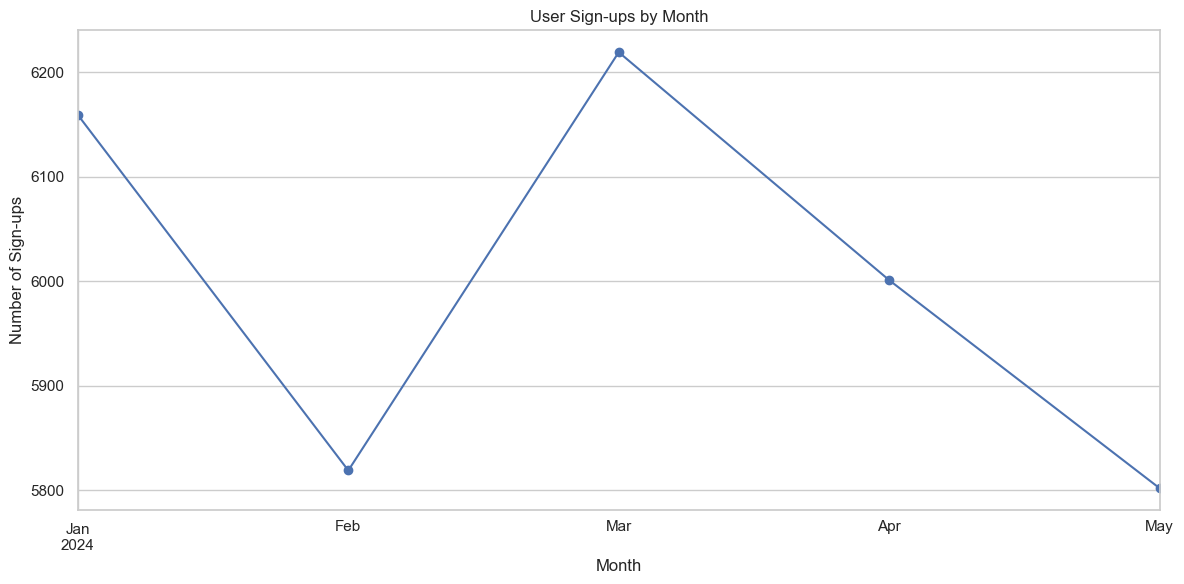

In [12]:
# Convert creation_date to datetime
users_df["creation_date"] = pd.to_datetime(users_df["creation_date"])

# Analyze user sign-ups by month
users_df["signup_month"] = users_df["creation_date"].dt.to_period("M")
signup_by_month = users_df.groupby("signup_month").size()

# Plot user sign-ups by month
plt.figure(figsize=(12, 6))
signup_by_month.plot(kind="line", marker="o")
plt.title("User Sign-ups by Month")
plt.xlabel("Month")
plt.ylabel("Number of Sign-ups")
plt.grid(True)
plt.tight_layout()
plt.show()

## Explore the Locations Dataset

In [11]:
# Display the first few rows of the locations dataset
locations_df.head()

,location_id,location_name,address,city,state,zip_code,latitude,longitude
0,2702,"Jackson, Velazquez and Gonzales",3140 Heath Radial Apt. 604,Modesto,CA,94540,86.258020,-169.244800
1,4380,Bean LLC,51144 Patrick Isle Suite 397,Fontana,CA,92188,-74.455893,-42.279882
2,7709,Gilbert-Simmons,4738 Lewis Locks,Roseville,CA,91032,-65.430931,-64.763489
3,8607,Coleman-Robinson,324 Robin Causeway,Modesto,CA,93714,-64.281076,-77.669631
4,5499,Deleon Group,51725 Evans View,Roseville,CA,91849,18.495158,-154.765780


In [13]:
# Check for missing values
locations_df.isnull().sum()

location_id      0
location_name    0
address          0
city             0
state            0
zip_code         0
latitude         0
longitude        0
dtype: int64

state
CA    300
Name: count, dtype: int64


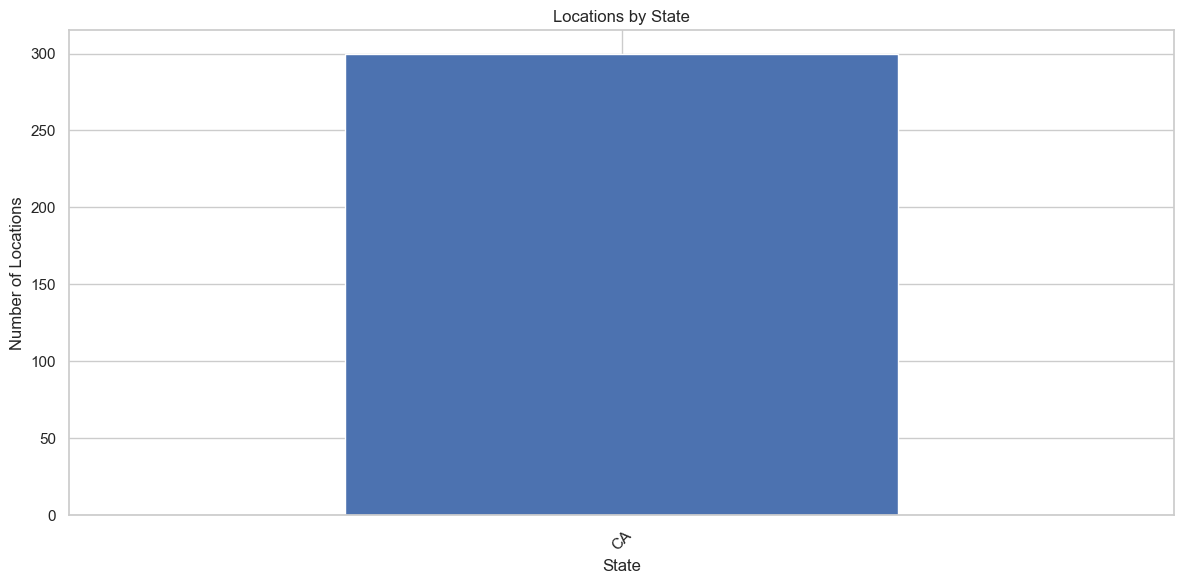

In [14]:
# Analyze locations by state
locations_by_state = locations_df["state"].value_counts()
print(locations_by_state)

# Plot locations by state
plt.figure(figsize=(12, 6))
locations_by_state.plot(kind="bar")
plt.title("Locations by State")
plt.xlabel("State")
plt.ylabel("Number of Locations")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

city
Oakland          13
Chula Vista      11
San Francisco    11
Oceanside        11
Elk Grove        11
Santa Rosa        9
Anaheim           9
Roseville         9
Sunnyvale         7
Simi Valley       7
Name: count, dtype: int64


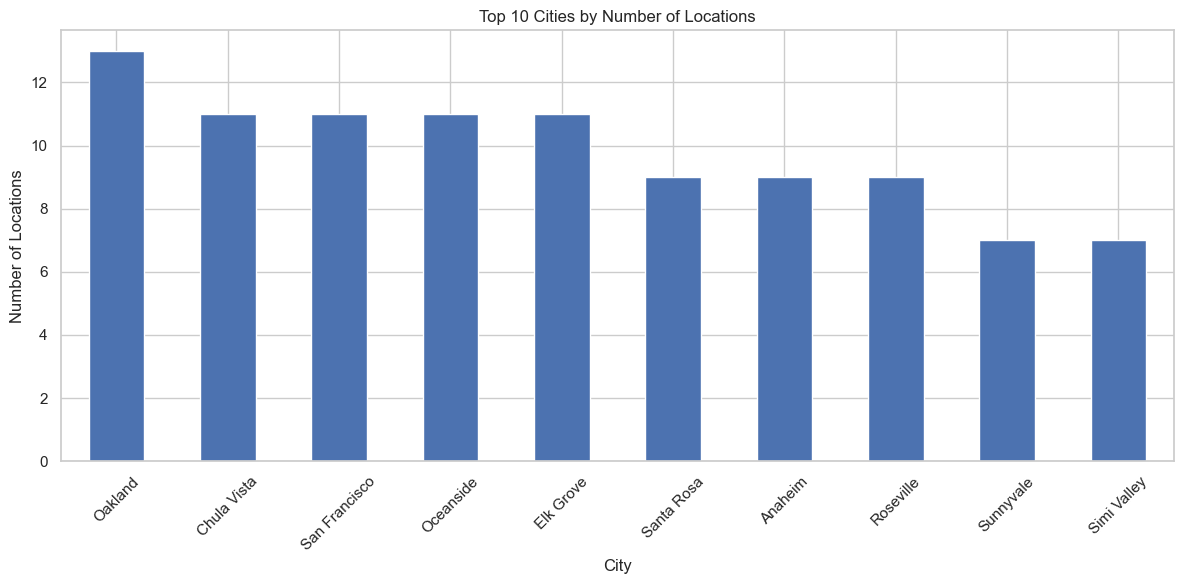

In [15]:
# Analyze locations by city (top 10)
locations_by_city = locations_df["city"].value_counts().head(10)
print(locations_by_city)

# Plot top 10 cities by number of locations
plt.figure(figsize=(12, 6))
locations_by_city.plot(kind="bar")
plt.title("Top 10 Cities by Number of Locations")
plt.xlabel("City")
plt.ylabel("Number of Locations")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Explore the Rental Transactions Dataset

In [16]:
# Display the first few rows of the rental transactions dataset
transactions_df.head()

,rental_id,user_id,vehicle_id,rental_start_time,rental_end_time,pickup_location,dropoff_location,total_amount
0,b139d8e1b2,320be8068b,0d52304987,2024-02-28 08:05:00,2024-03-01 05:05:00,1497,6785,450.0
1,7afd60f6d3,320be8068b,975d72985c,2024-01-07 20:16:00,2024-01-09 21:16:00,5345,2608,2450.0
2,733a9361bc,8f31b734a6,0d9f0f0fb9,2024-01-07 09:36:00,2024-01-07 17:36:00,2546,5442,80.0
3,6e546b69dd,8f31b734a6,967fdab45e,2024-01-05 11:30:00,2024-01-07 04:30:00,8147,4380,2050.0
4,acc192b64a,8f31b734a6,32d58ea4b7,2024-03-06 18:19:00,2024-03-09 14:19:00,6290,8932,1360.0


In [17]:
# Check for missing values
transactions_df.isnull().sum()

rental_id            0
user_id              0
vehicle_id           0
rental_start_time    0
rental_end_time      0
pickup_location      0
dropoff_location     0
total_amount         0
dtype: int64

In [18]:
# Convert rental start and end times to datetime
transactions_df["rental_start_time"] = pd.to_datetime(
    transactions_df["rental_start_time"]
)
transactions_df["rental_end_time"] = pd.to_datetime(transactions_df["rental_end_time"])

# Calculate rental duration in hours
transactions_df["rental_duration_hours"] = (
    transactions_df["rental_end_time"] - transactions_df["rental_start_time"]
).dt.total_seconds() / 3600

# Display summary statistics for rental duration and total amount
print("Rental Duration (hours) Statistics:")
print(transactions_df["rental_duration_hours"].describe())
print("\nTotal Amount Statistics:")
print(transactions_df["total_amount"].describe())

Rental Duration (hours) Statistics:
count    20080.000000
mean        36.514293
std         20.780629
min          1.000000
25%         18.000000
50%         37.000000
75%         54.000000
max         72.000000
Name: rental_duration_hours, dtype: float64

Total Amount Statistics:
count    20080.000000
mean       806.803785
std        772.618014
min         10.000000
25%        290.000000
50%        570.000000
75%       1060.000000
max       3600.000000
Name: total_amount, dtype: float64


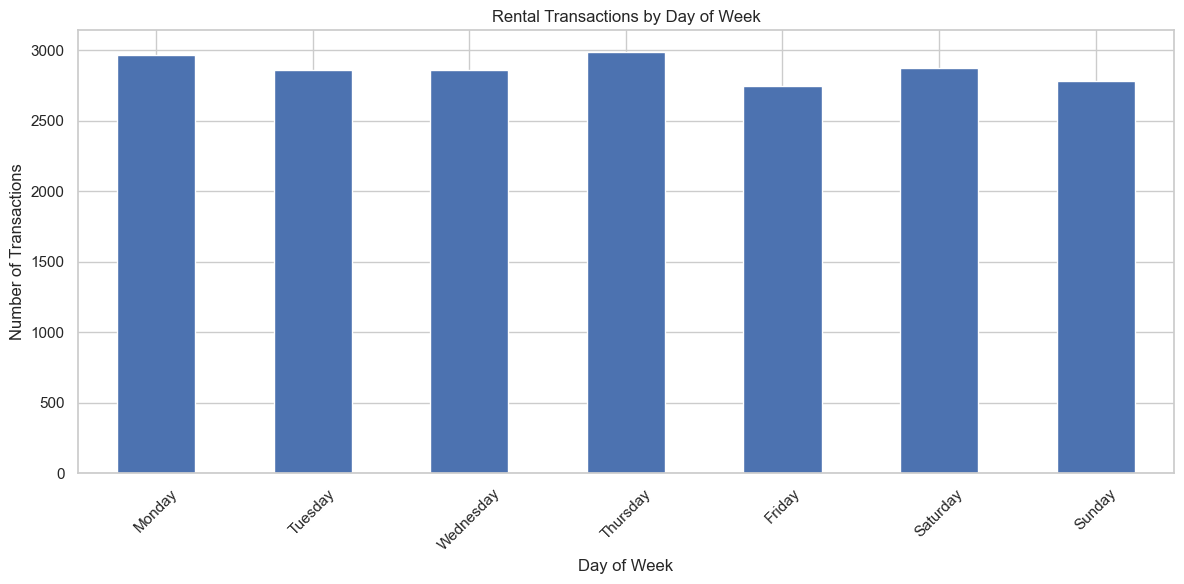

In [20]:
# Analyze transactions by day of week
transactions_df["day_of_week"] = transactions_df["rental_start_time"].dt.day_name()
day_order = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]
transactions_by_day = transactions_df["day_of_week"].value_counts().reindex(day_order)

# Plot transactions by day of week
plt.figure(figsize=(12, 6))
transactions_by_day.plot(kind="bar")
plt.title("Rental Transactions by Day of Week")
plt.xlabel("Day of Week")
plt.xticks(rotation=45)
plt.ylabel("Number of Transactions")
plt.tight_layout()
plt.show()

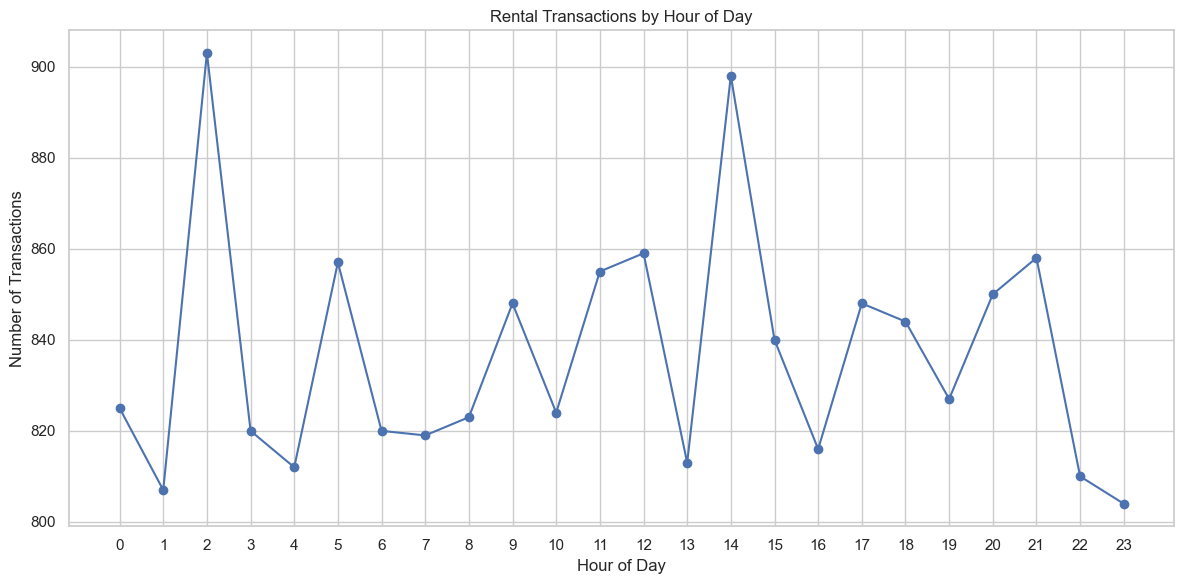

In [21]:
# Analyze transactions by hour of day
transactions_df["hour_of_day"] = transactions_df["rental_start_time"].dt.hour
transactions_by_hour = transactions_df.groupby("hour_of_day").size()

# Plot transactions by hour of day
plt.figure(figsize=(12, 6))
transactions_by_hour.plot(kind="line", marker="o")
plt.title("Rental Transactions by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Transactions")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

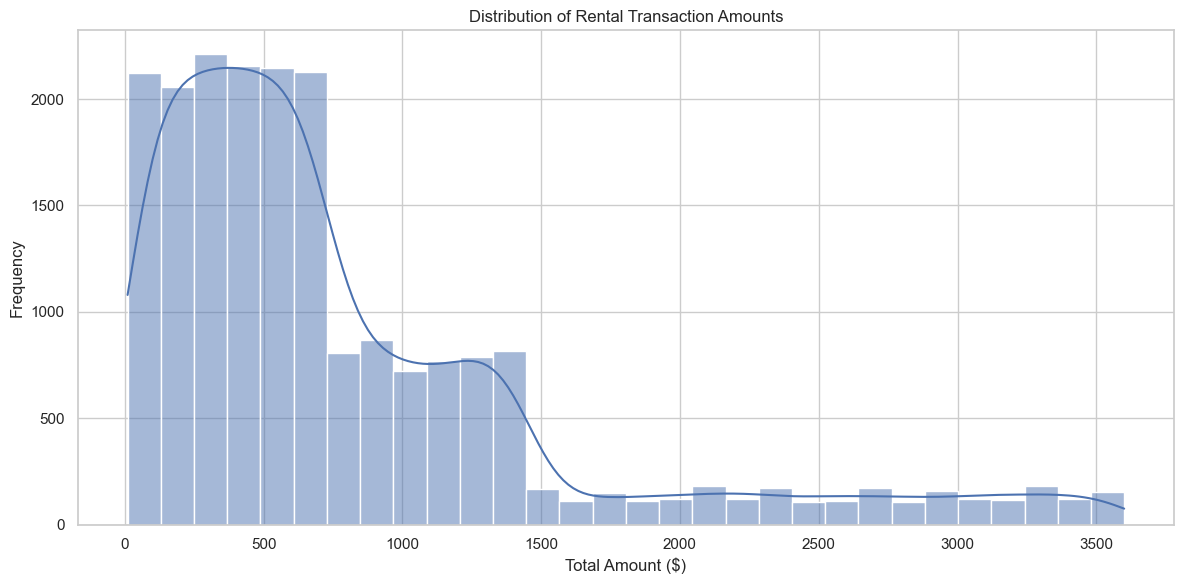

In [22]:
# Analyze distribution of total amount
plt.figure(figsize=(12, 6))
sns.histplot(transactions_df["total_amount"], bins=30, kde=True)
plt.title("Distribution of Rental Transaction Amounts")
plt.xlabel("Total Amount ($)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

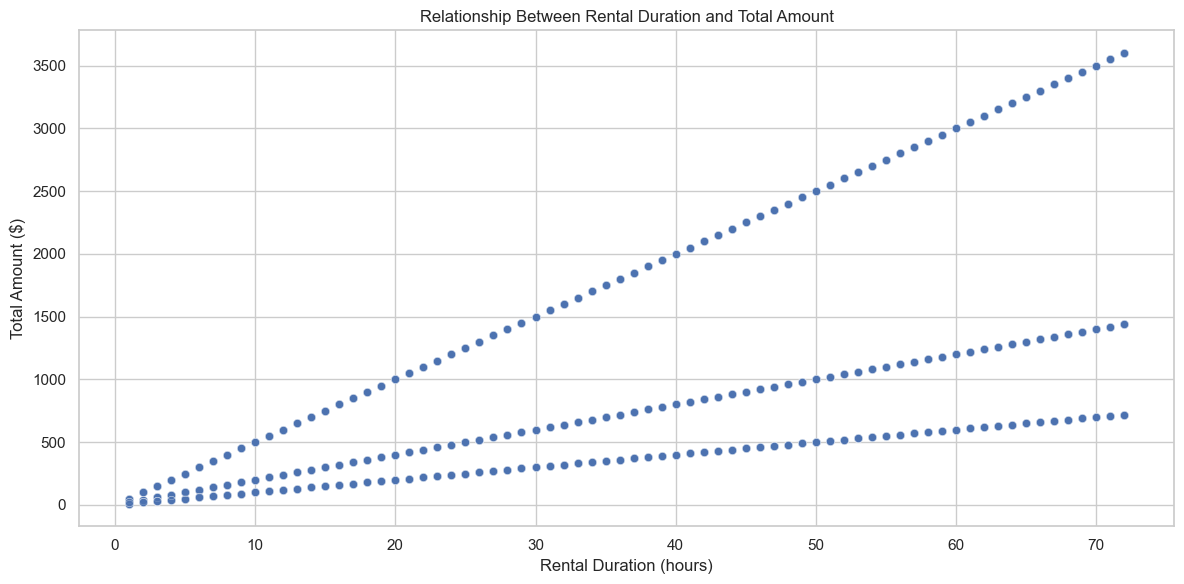

In [23]:
# Analyze relationship between rental duration and total amount
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x="rental_duration_hours", y="total_amount", data=transactions_df, alpha=0.5
)
plt.title("Relationship Between Rental Duration and Total Amount")
plt.xlabel("Rental Duration (hours)")
plt.ylabel("Total Amount ($)")
plt.grid(True)
plt.tight_layout()
plt.show()

## Cross-Dataset Analysis

vehicle_type
high_end    1845.024938
premium      724.833518
basic        365.987896
Name: total_amount, dtype: float64


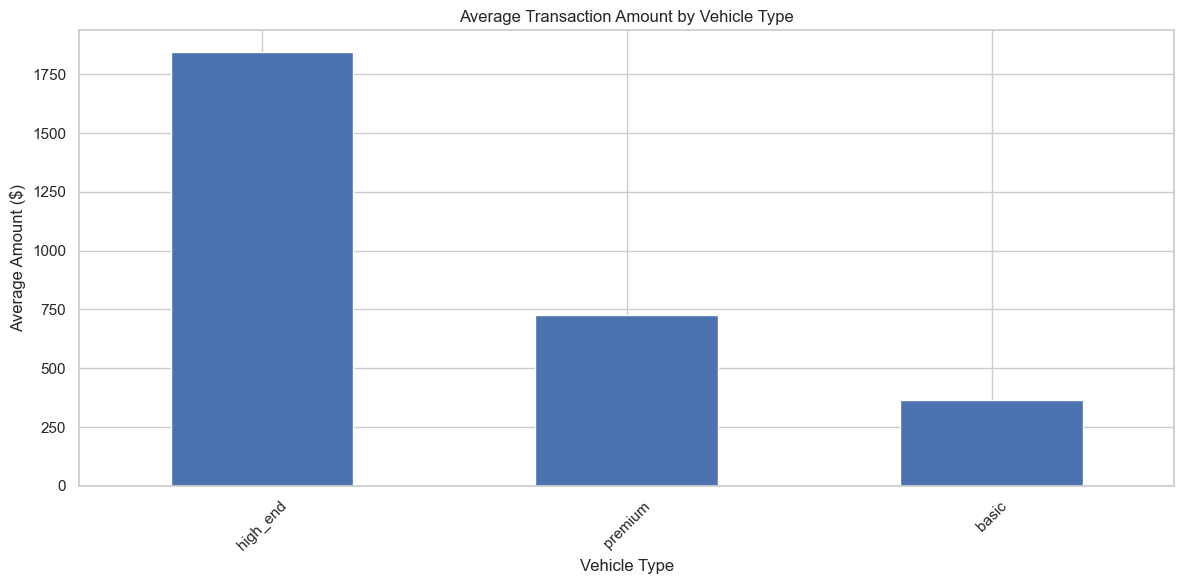

In [24]:
# Merge transactions with vehicles to analyze by vehicle type
transactions_vehicles = pd.merge(
    transactions_df,
    vehicles_df[["vehicle_id", "brand", "vehicle_type"]],
    on="vehicle_id",
    how="inner",
)

# Analyze average transaction amount by vehicle type
avg_amount_by_vehicle_type = (
    transactions_vehicles.groupby("vehicle_type")["total_amount"]
    .mean()
    .sort_values(ascending=False)
)
print(avg_amount_by_vehicle_type)

# Plot average transaction amount by vehicle type
plt.figure(figsize=(12, 6))
avg_amount_by_vehicle_type.plot(kind="bar")
plt.title("Average Transaction Amount by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Average Amount ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

   location_id               location_name           city state  transaction_count
0         4380                    Bean LLC        Fontana    CA                 88
1         4856     Jones, Ponce and Mccall      Escondido    CA                 86
2         9536                   Brown Ltd         Irvine    CA                 85
3         3269  Johnson, Evans and Chapman       Palmdale    CA                 84
4         5984      Huang, Owens and Mejia        Ontario    CA                 84
5         6350                  Parker LLC         Orange    CA                 82
6         6690             Salinas-Frazier        Hayward    CA                 82
7         7734            Bridges and Sons         Orange    CA                 82
8         5402    Jenkins, Valdez and Sims  San Francisco    CA                 82
9         5345                    Hill Ltd      Lancaster    CA                 81


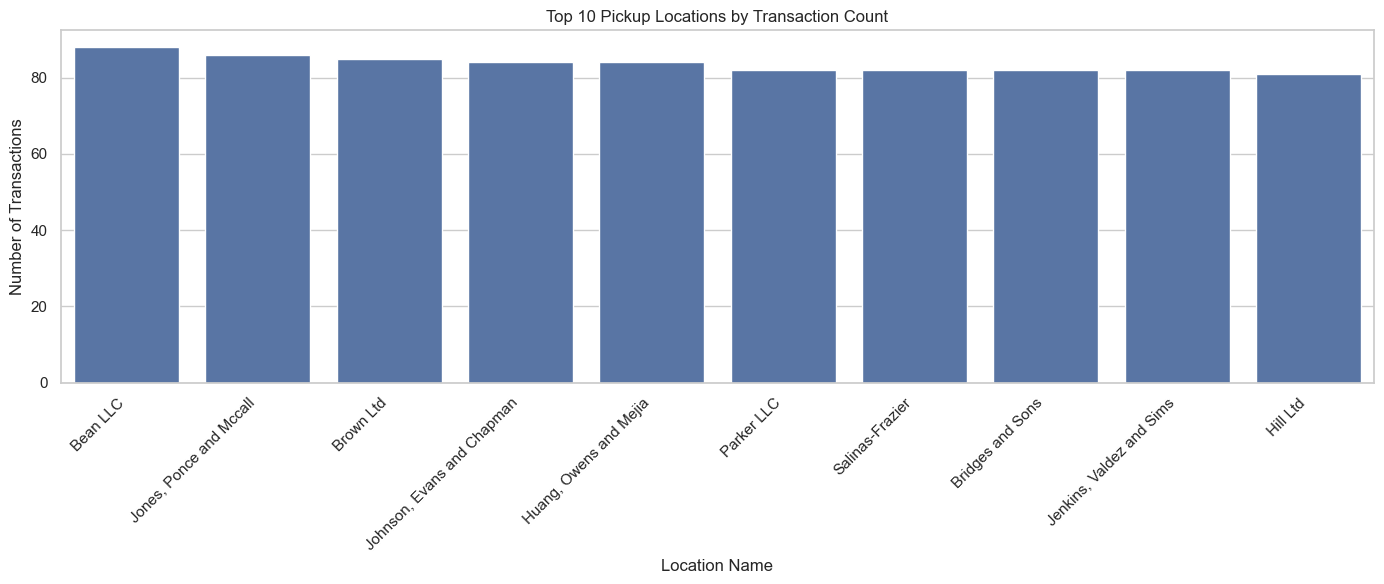

In [26]:
# Analyze top 10 pickup locations by transaction count
top_pickup_locations = transactions_df["pickup_location"].value_counts().head(10)
top_pickup_locations_df = pd.DataFrame(
    {
        "location_id": top_pickup_locations.index,
        "transaction_count": top_pickup_locations.values,
    }
)
top_pickup_locations_with_info = pd.merge(
    top_pickup_locations_df, locations_df, on="location_id", how="inner"
)
print(
    top_pickup_locations_with_info[
        ["location_id", "location_name", "city", "state", "transaction_count"]
    ]
)

# Plot top 10 pickup locations
plt.figure(figsize=(14, 6))
sns.barplot(
    x="location_name", y="transaction_count", data=top_pickup_locations_with_info
)
plt.title("Top 10 Pickup Locations by Transaction Count")
plt.xlabel("Location Name")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

      user_id first_name last_name  transaction_count
0  6a05380817     Edward      Cole                  3
1  2ef37cf93a      Jenna      Lara                  3
2  67d93cce3d       Anne   Alvarez                  3
3  2b885f8347      Glenn    Fuller                  3
4  8bde0e73ff       Beth    Moreno                  3
5  c919fa0e21      Donna   Donovan                  3
6  d87ac40967       Mark     Jones                  3
7  4edef314eb     Calvin      Hart                  3
8  2f6bc466cb     Walter    Curtis                  3
9  83008b0c44       John   Shaffer                  3


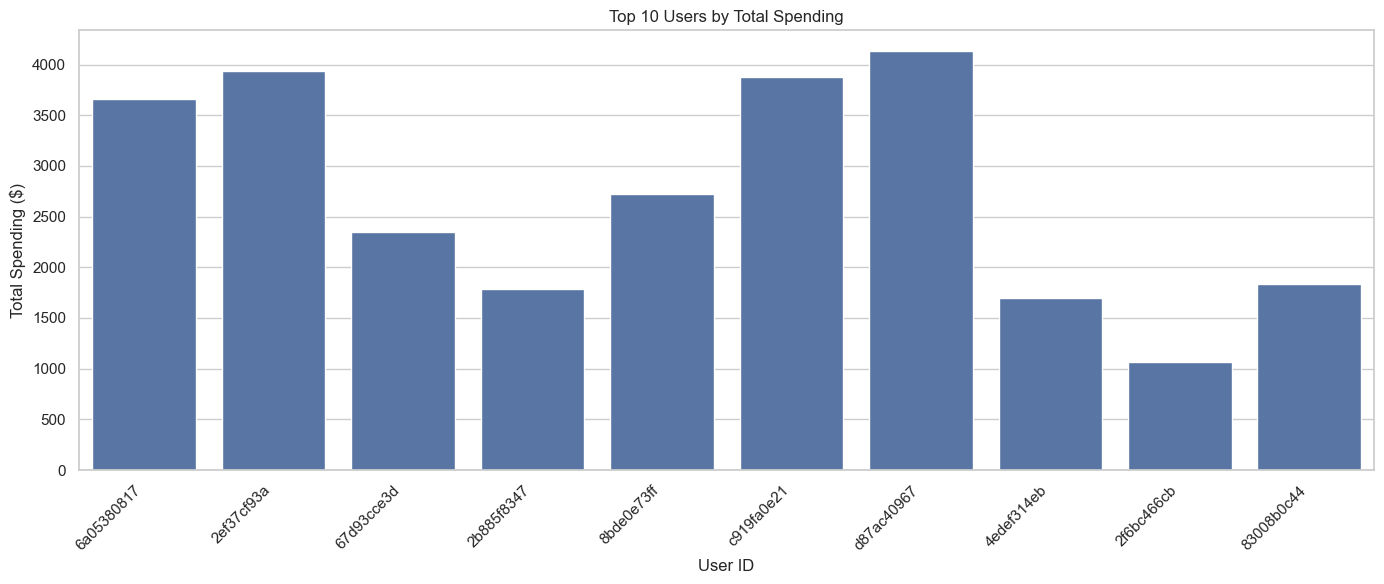

In [28]:
# Analyze top 10 users by number of transactions
top_users = transactions_df["user_id"].value_counts().head(10)
top_users_df = pd.DataFrame(
    {"user_id": top_users.index, "transaction_count": top_users.values}
)
top_users_with_info = pd.merge(
    top_users_df, users_df, on="user_id", how="inner", validate="1:1"
)
print(top_users_with_info[["user_id", "first_name", "last_name", "transaction_count"]])

# Calculate total spending for top users
top_user_spending = (
    transactions_df[transactions_df["user_id"].isin(top_users.index)]
    .groupby("user_id")["total_amount"]
    .sum()
    .reset_index()
)
top_users_complete = pd.merge(
    top_users_with_info, top_user_spending, on="user_id", how="inner"
)

# Plot top 10 users by total spending
plt.figure(figsize=(14, 6))
sns.barplot(x="user_id", y="total_amount", data=top_users_complete)
plt.title("Top 10 Users by Total Spending")
plt.xlabel("User ID")
plt.ylabel("Total Spending ($)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## Summary of Findings

Based on the exploratory data analysis, here are some key findings:

1. **Vehicle Distribution**: The dataset contains 109,584 vehicles with a balanced distribution across vehicle types (basic, premium, and high_end). Popular brands include Nissan, Tesla, Porsche, Ferrari, and Chevrolet.

2. **User Demographics**: The user dataset contains 30,000 users with a good distribution across different age groups and genders. Most users are active, with sign-up dates spread across multiple years.

3. **Geographic Distribution**: All 300 rental locations are in California, with cities like Oakland, Chula Vista, San Francisco, Oceanside, and Elk Grove having the highest number of locations.

4. **Rental Transactions**: The dataset contains 20,080 rental transactions with no missing values. The average rental duration is 36.5 hours, with a standard deviation of 20.8 hours. Rental durations range from 1 hour to 72 hours.

5. **Pricing Patterns**: The average transaction amount is $806.80, with a standard deviation of $772.62. Transaction amounts range from $10 to $3,600, showing significant variability in pricing.

6. **Temporal Patterns**: Rental transactions show clear patterns by day of week, with weekends being more popular than weekdays. There are also distinct hourly patterns throughout the day.

7. **Relationship Between Duration and Cost**: There's a positive correlation between rental duration and transaction amount, though pricing likely varies by vehicle type and other factors.

These insights will guide our Spark jobs on EMR to extract meaningful business metrics from the data and help optimize the car rental service operations.